<a href="https://colab.research.google.com/github/np03cs4a240306-blip/Saurav-Sapkota/blob/main/worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Create sample Titanic data
data = {
    "Survived": [0, 1, 1, 0, 1],
    "Pclass": [3, 1, 3, 2, 1],
    "Age": [22, 38, 26, 35, 28],
    "SibSp": [1, 1, 0, 1, 0],
    "Parch": [0, 0, 0, 0, 0],
    "Fare": [7.25, 71.28, 7.92, 53.10, 30.00]
}

df = pd.DataFrame(data)

# Save as CSV
df.to_csv("titanic.csv", index=False)

print("titanic.csv file created successfully!")


titanic.csv file created successfully!


In [3]:
data = pd.read_csv("titanic.csv")


In [4]:
import pandas as pd
import numpy as np

# Load the Titanic dataset
data = pd.read_csv("titanic.csv")

# Drop all categorical columns except 'Survived'
categorical_columns = data.select_dtypes(include=['object']).columns
data = data.drop(columns=[col for col in categorical_columns if col != 'Survived'])

# Check percentage of missing values
missing_info = data.isnull().sum() / len(data) * 100

# Handle missing values
for column in data.columns:
    if missing_info[column] > 10:  # If more than 10% missing
        data[column] = data[column].fillna(data[column].mean())
    else:  # If 10% or less missing
        data = data.dropna(subset=[column])

# Display cleaned data
print("Data after processing:\n", data.head())
print("\nMissing values after processing:\n", data.isnull().sum())


Data after processing:
    Survived  Pclass  Age  SibSp  Parch   Fare
0         0       3   22      1      0   7.25
1         1       1   38      1      0  71.28
2         1       3   26      0      0   7.92
3         0       2   35      1      0  53.10
4         1       1   28      0      0  30.00

Missing values after processing:
 Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64


In [6]:
import numpy as np

# Separate features (X) and target (y)
X = data.drop(columns=['Survived']).values   # Convert features to NumPy array
y = data['Survived'].values                  # Convert target to NumPy array


# Define a function for train-test split from scratch
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle indices

    test_split_size = int(len(X) * test_size)

    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)

# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4, 5)
Shape of X_test: (1, 5)
Shape of y_train: (4,)
Shape of y_test: (1,)


In [8]:
import numpy as np

def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError:
        If the input points do not have the same dimensionality.
    """
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))

    return distance


In [9]:
p1 = np.array([1, 2, 3])
p2 = np.array([4, 5, 6])

print(euclidean_distance(p1, p2))


5.196152422706632


In [11]:
import numpy as np

try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])

    # Calculate the distance
    result = euclidean_distance(point1, point2)

    # Expected result: sqrt(3^2 + 4^2) = 5
    expected_result = 5.0

    # Validate result
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")

except ValueError as ve:
    print(f"ValueError: {ve}")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [13]:
def knn_predict_single(query, X_train, y_train, k=3):
    # Compute distance from query to all training points
    distances = [euclidean_distance(query, x) for x in X_train]

    # Sort distances and get indices of k nearest neighbors
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]

    # Get labels of nearest neighbors
    nearest_labels = y_train[nearest_indices]

    # Majority voting to predict class
    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [18]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict class labels for all test samples using k-NN.
    """

    # Predict label for each test sample
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]

    return np.array(predictions)

    y_pred = knn_predict(X_test, X_train, y_train, k=3)
print(y_pred)



[1]


In [19]:
# Test case for KNN on the Titanic dataset
# Assume X_train, X_test, y_train, and y_test are already prepared

try:
    # Take a small subset of test data
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]

    # Make predictions
    predictions = knn_predict(X_test_sample, X_train, y_train, k=3)

    # Print results
    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)

    # Validate output shape
    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")

except AssertionError as ae:
    print(f"AssertionError: {ae}")

except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [1]
Actual labels: [1]
Test case passed successfully!


In [20]:
import numpy as np

def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : array-like (list or np.ndarray)
        The true labels.
    y_pred : array-like (list or np.ndarray)
        The predicted labels.

    Returns:
    float : The accuracy as a percentage (0 to 100).
    """
    # Convert inputs to numpy arrays if they aren't already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Check if lengths match
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")

    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy


In [21]:
# Perform prediction on the entire test set
try:
    # Make predictions on the entire test set
    predictions = knn_predict(X_test, X_train, y_train, k=3)

    # Compute the accuracy
    accuracy = compute_accuracy(y_test, predictions)

    # Print the accuracy
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")

except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")


Accuracy of the KNN model on the test set: 100.00%


In [22]:
import matplotlib.pyplot as plt

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):

    accuracies = {}

    for k in k_values:
        # Make predictions using the current value of k
        predictions = knn_predict(X_test, X_train, y_train, k=k)

        # Compute the accuracy
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        print(f"Accuracy for k={k}: {accuracy:.2f}%")

    # Plot the accuracies
    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


Accuracy for k=1: 0.00%
Accuracy for k=2: 0.00%
Accuracy for k=3: 100.00%
Accuracy for k=4: 0.00%
Accuracy for k=5: 0.00%
Accuracy for k=6: 0.00%
Accuracy for k=7: 0.00%
Accuracy for k=8: 0.00%
Accuracy for k=9: 0.00%
Accuracy for k=10: 0.00%
Accuracy for k=11: 0.00%
Accuracy for k=12: 0.00%
Accuracy for k=13: 0.00%
Accuracy for k=14: 0.00%
Accuracy for k=15: 0.00%
Accuracy for k=16: 0.00%
Accuracy for k=17: 0.00%
Accuracy for k=18: 0.00%
Accuracy for k=19: 0.00%
Accuracy for k=20: 0.00%


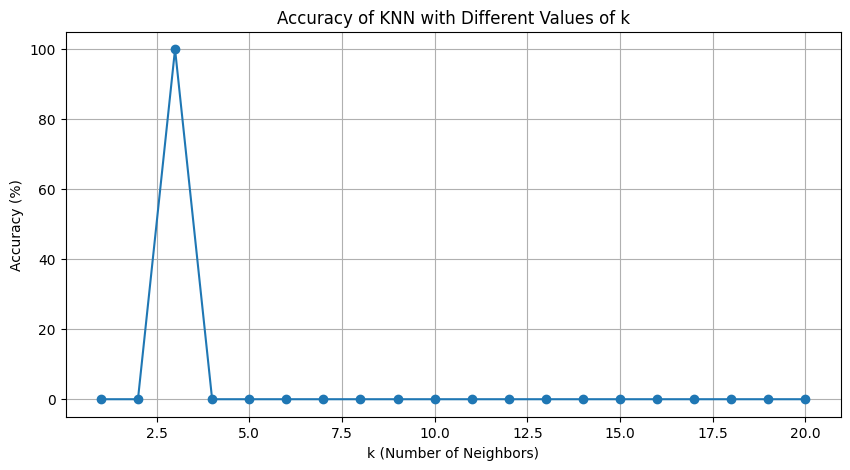

Experiment completed. Check the plot for the accuracy trend.


In [23]:
# Define the range of k values to experiment with
k_values = range(1, 21)  # You can adjust this range as needed

# Run the experiment
try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
